<a href="https://colab.research.google.com/github/AlvaroCarrizales/Proyecto_inteligencia_artificial/blob/master/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import math as m
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
y=[]
X=np.empty((0,288*432), int)
X1=np.empty((0,288*432), int)
for punt in range(0,200):
  directorio="L%d.jpg" % (punt+1)
  a=cv2.imread(directorio)
  rgB=np.matrix(a[:,:,0])
  vector=np.reshape(rgB,(1,288*432))
  X=np.append(X,vector,axis=0)
print(X.shape)
y1 = [8,9,21,13,4,4,9,8,23,16,4,20,21,11,18,23,13,19,22,15,23,26,17,11,3,11,2,21,2,9,13,3,2,9,2,11,8,9,4,3,9,21,21,11,3,6,3,9,9,11,2,9,11,9,16,4,4,11,11,3,4,4,11,3,13,23,2,26,4,13,18,22,26,21,16,24,12,4,18,22,23,18,4,4,7,23,19,23,18,18,2,23,16,12,16,9,21,21,10,11,14,6,4,2,20,5,11,1,19,26,17,11,14,19,19,14,12,16,16,11,12,15,22,18,21,14,13,1,15,14,15,2,21,12,20,19,24,13,15,26,3,16,8,11,9,17,23,31,32,36,31,31,36,30,33,35,27,33,36,29,31,30,30,36,30,36,29,31,30,33,33,35,31,33,30,30,34,33,31,31,32,36,30,36,28,28,28,29,28,36,30,34,36,27,30,29,33,31,31,34]
yy = np.array(y1)
print(yy.shape)
est = GaussianNB()
s = cross_val_score(est, X, yy, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print(s)
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
est = GaussianNB()
est.fit(X,yy)
predictions = est.predict(X)
Xtr, Xts, ytr, yts = train_test_split(X,yy, test_size=.8)
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i' ,'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0']


(200, 124416)
(200,)
[0.75 0.75 0.85 0.65 0.9  0.8  0.75 0.8  0.7  0.75]
accuracy 0.770 (+/- 0.06782)


In [0]:
def plot_train_test(estimator, Xtr, Xts, ytr, yts, alpha=.5):
    estimator.fit(Xtr,ytr)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.title("TRAIN accuracy %.3f"%estimator.score(Xtr, ytr))
    plt.subplot(122)
    plt.title("TEST accuracy %.3f"%estimator.score(Xts, yts))

In [170]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving 8.jpg to 8.jpg


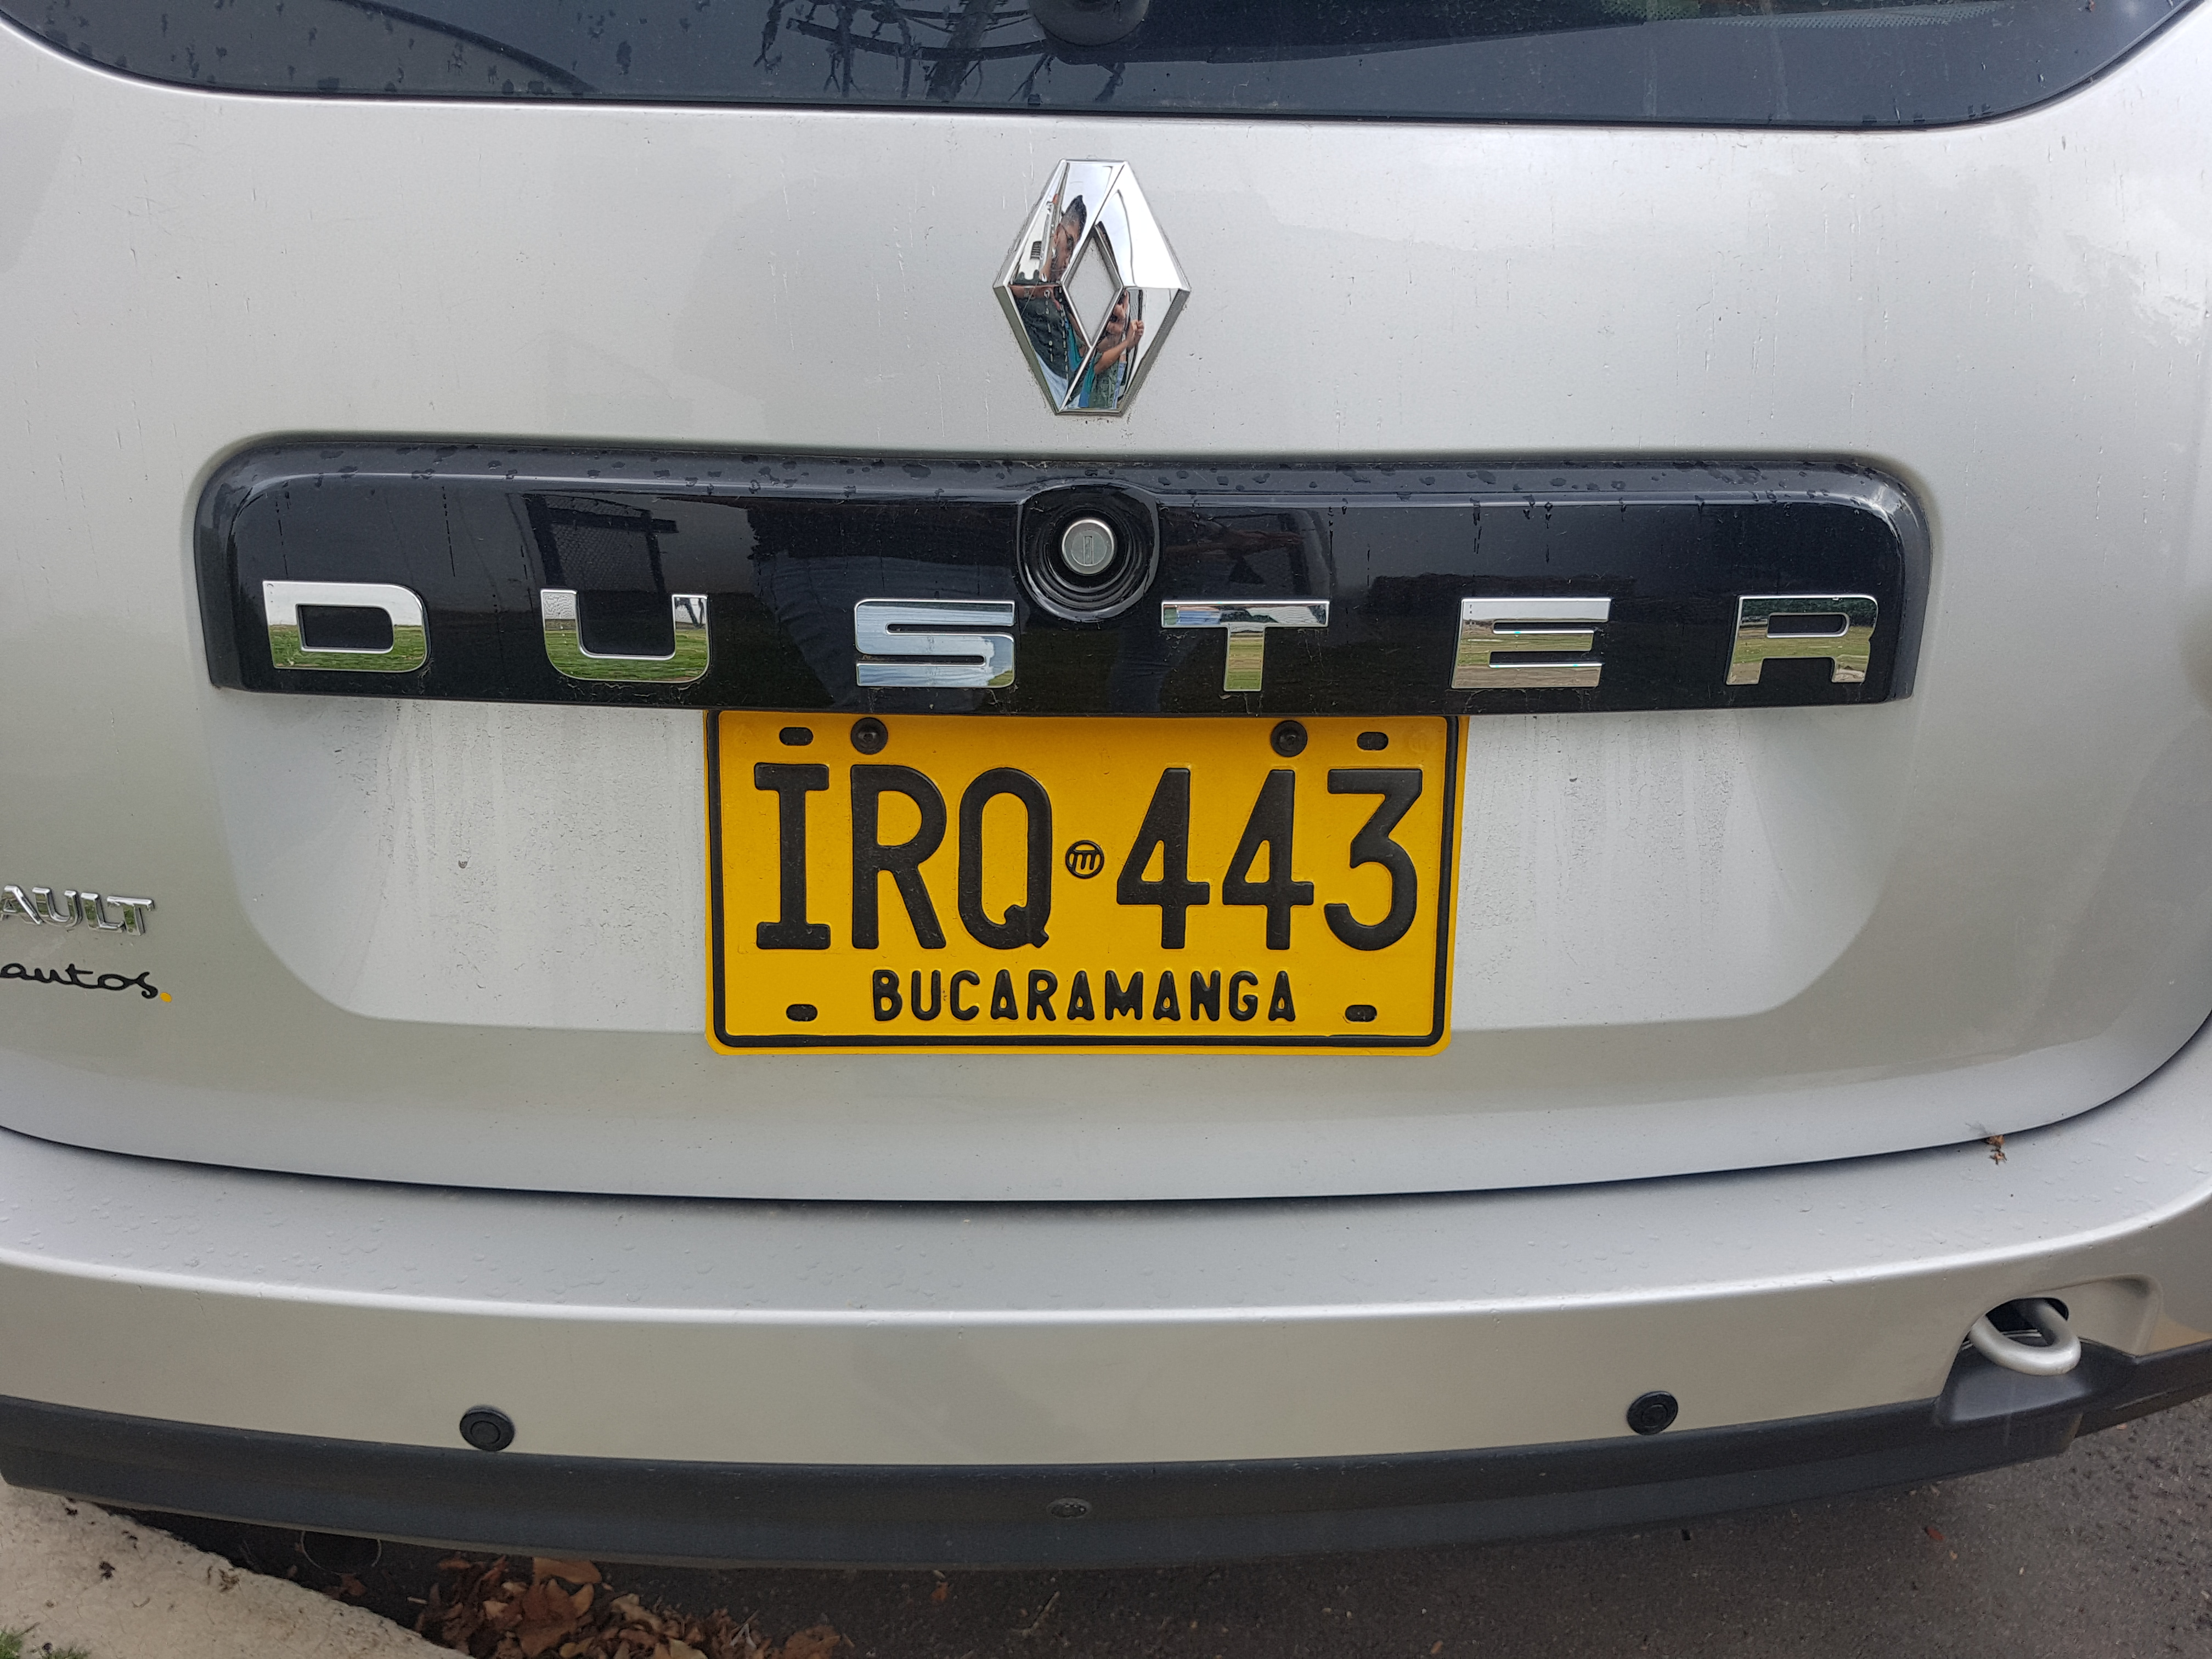

In [171]:
Image('8.jpg')

In [0]:
directorio="8.jpg"
a=cv2.imread(directorio)
rgB=np.matrix(a[:,:,0])
rGb=np.matrix(a[:,:,1])
Rgb=np.matrix(a[:,:,2])
I=cv2.absdiff(rGb,rgB)
II=I

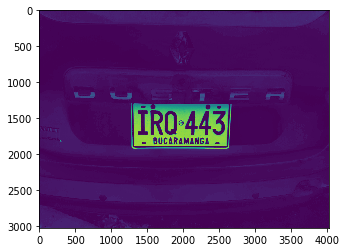

In [173]:
plt.imshow(II)
plt.show()

In [0]:
[fil,col]=I.shape 
for o in range(0,fil):
  for oo in range(0,col):
    if I[o,oo]<80:
      I[o,oo]=0
for o in range(0,fil):
  for oo in range(0,col):
    if I[o,oo]>0:
      I[o,oo]=1

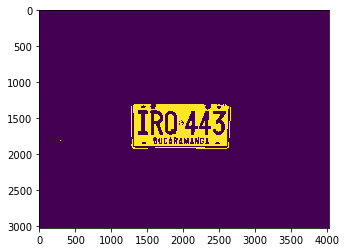

In [175]:
plt.imshow(I)
plt.show()

In [0]:
se=np.ones((50,50),np.uint8)
se2=np.ones((10,10),np.uint8)
closing=cv2.morphologyEx(I,cv2.MORPH_CLOSE,se)
dilation=cv2.dilate(closing,se2,1)

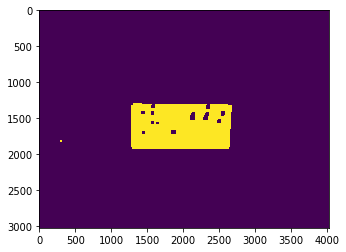

In [177]:
plt.imshow(dilation)
plt.show()

In [178]:
S,contours,hierarchy=cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt=contours[:]
num=len(cnt)
box=np.zeros((num,4))
for j in range(0,num):
  box[j,:]=cv2.boundingRect(cnt[j])
L=np.zeros((num,4))
Max=[0,0]
for j in range(0,num):
  L[j,:]=box[j]
  if L[j,2]>Max[1]:
    Max=[j,L[j,2]]
BOX=box[Max[0],:]
b=a[int(BOX[1]):int(BOX[1])+int(BOX[3]),int(BOX[0]):int(BOX[0])+int(BOX[2]),:]
directorio2="blank.jpg"
cv2.imwrite(directorio2,b)

True

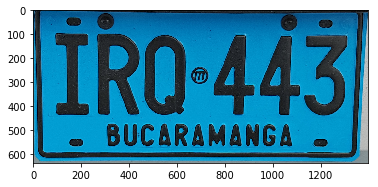

In [179]:
plt.imshow(b)
plt.show()

In [0]:
directorio3="blank.jpg"
A=cv2.imread(directorio3)
[fil,col,cap]=A.shape
rgB=A[:,:,0]
rGb=A[:,:,1]
Rgb=A[:,:,2]
R=Rgb/255.0
G=rGb/255.0
B=rgB/255.0
K=np.zeros((fil,col))
for o in range(0,fil):
  for oo in range(0,col):
    MAX=max(R[o,oo],G[o,oo],B[o,oo])
    K[o,oo]=1-MAX
cv2.imwrite("prueba.bmp",K)
k=cv2.imread("prueba.bmp")

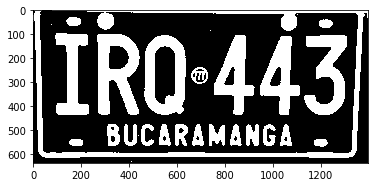

In [181]:
plt.imshow(k*255)
plt.show()

In [0]:
BW1=cv2.Laplacian(k,cv2.CV_8UC1)
Image=BW1[:,:,0]+BW1[:,:,1]+BW1[:,:,1]
ret,thresh=cv2.threshold(Image,0,255,0)
S,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt=contours[:]
num=len(cnt)
box=np.zeros((num,4))
for j in range(0,num):
  box[j,:]=cv2.boundingRect(cnt[j])
Box=np.zeros((20,4))
[L,A]=thresh.shape
q=0
for j in range(0,num):
  p=box[j,:]
  if p[3]>=0.4*L and p[3]<=0.7*L and p[2]>=0.08*A and p[2]<=0.17*A:
    Box[q]=p
    q=q+1
BOX=np.zeros((6,4))
num=len(Box)
q=0
for j in range(0,num):
  if j%2==0 and j<11:
    BOX[q]=Box[j]
    q=q+1

In [183]:
print(BOX)

[[ 946.  107.  169.  332.]
 [1131.  105.  182.  335.]
 [ 753.  104.  173.  333.]
 [ 464.  103.  174.  335.]
 [ 267.   98.  179.  340.]
 [  92.   94.  142.  345.]]


In [0]:
for i in range(1,6):
  for j in range(0,6-i):
    if(BOX[j,0] > BOX[j+1,0]):
      TEMP=np.zeros((6,4))
      TEMP[j,:]=BOX[j,:]
      BOX[j,:]=BOX[j+1,:]
      BOX[j+1,:]=TEMP[j,:]

In [185]:
print(BOX)

[[  92.   94.  142.  345.]
 [ 267.   98.  179.  340.]
 [ 464.  103.  174.  335.]
 [ 753.  104.  173.  333.]
 [ 946.  107.  169.  332.]
 [1131.  105.  182.  335.]]


In [0]:
LETRA1=k[int(BOX[0,1]):int(BOX[0,1])+int(BOX[0,3]),int(BOX[0,0]):int(BOX[0,0])+int(BOX[0,2])]
LETRA2=k[int(BOX[1,1]):int(BOX[1,1])+int(BOX[1,3]),int(BOX[1,0]):int(BOX[1,0])+int(BOX[1,2])]
LETRA3=k[int(BOX[2,1]):int(BOX[2,1])+int(BOX[2,3]),int(BOX[2,0]):int(BOX[2,0])+int(BOX[2,2])]
NUM1=k[int(BOX[3,1]):int(BOX[3,1])+int(BOX[3,3]),int(BOX[3,0]):int(BOX[3,0])+int(BOX[3,2])]
NUM2=k[int(BOX[4,1]):int(BOX[4,1])+int(BOX[4,3]),int(BOX[4,0]):int(BOX[4,0])+int(BOX[4,2])]
NUM3=k[int(BOX[5,1]):int(BOX[5,1])+int(BOX[5,3]),int(BOX[5,0]):int(BOX[5,0])+int(BOX[5,2])]

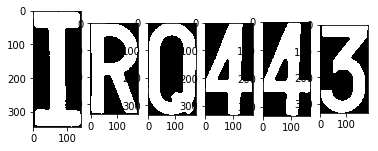

In [187]:
plt.imshow(LETRA1*255),plt.savefig("P1.jpg")
plt.imshow(LETRA2*255),plt.savefig("P2.jpg")
plt.imshow(LETRA3*255),plt.savefig("P3.jpg")
plt.imshow(NUM1*255),plt.savefig("P4.jpg")
plt.imshow(NUM2*255),plt.savefig("P5.jpg")
plt.imshow(NUM3*255),plt.savefig("P6.jpg")

plt.subplot(161),plt.imshow(LETRA1*255)
plt.subplot(162),plt.imshow(LETRA2*255)
plt.subplot(163),plt.imshow(LETRA3*255)
plt.subplot(164),plt.imshow(NUM1*255)
plt.subplot(165),plt.imshow(NUM2*255)
plt.subplot(166),plt.imshow(NUM3*255)
plt.show()

In [188]:
text="PLACA: "
for apuntador in range(6):
  aa=cv2.imread("P%d.jpg" %(apuntador+1))
  rggB=np.matrix(aa[:,:,0])
  vectorr=np.reshape(rggB,(1,288*432))
  predictions = est.predict(vectorr)
  text=text+class_names[predictions[0]-1]
print(text)

PLACA: irq443
